# **Load Important Libraries**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Data collection
import yfinance as yf

#Data Scaling
from sklearn.preprocessing import MinMaxScaler



# **Load the data**

In [14]:
#Load data (Amazon)

df = pd.read_csv('amazon_stock_data.csv')
df = df.iloc[2000: df.shape[0]]
df

,Date,Open,High,Low,Close,Volume
2000,2005-04-28 00:00:00-04:00,1.583000,1.646000,1.581500,1.626000,289456000
2001,2005-04-29 00:00:00-04:00,1.643000,1.644500,1.576000,1.618000,210470000
2002,2005-05-02 00:00:00-04:00,1.615000,1.664000,1.605000,1.655000,181960000
2003,2005-05-03 00:00:00-04:00,1.647000,1.678000,1.644500,1.660500,135558000
2004,2005-05-04 00:00:00-04:00,1.667500,1.706000,1.663500,1.698000,155132000
...,...,...,...,...,...,...
6893,2024-10-07 00:00:00-04:00,182.949997,183.600006,180.250000,180.800003,42364200
6894,2024-10-08 00:00:00-04:00,181.919998,183.089996,180.919998,182.720001,26372100
6895,2024-10-09 00:00:00-04:00,182.820007,185.850006,182.050003,185.169998,26343100
6896,2024-10-10 00:00:00-04:00,187.130005,188.130005,185.830002,186.649994,27785000


# Splitting the Dataset

In [15]:
# Create a new dataframe with only the 'Close column
close = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = close.values
# Get the number of rows to train the model on
training_len = int(np.ceil( len(dataset) * .9 ))

training_len

4409

In [16]:
# Using Min Max Scalar to scale the data
sc = MinMaxScaler(feature_range=(0,1))


#Scaling the close (closing price) data
sc_close = sc.fit_transform(close)
sc_close



array([[0.00162308],
       [0.00158282],
       [0.00176903],
       ...,
       [0.92536355],
       [0.93281207],
       [0.94373332]])

In [17]:
# Create the training data set
# Create the scaled training data set
train_data = sc_close[0:int(training_len), :]

# creating empty sets
x_train = []
y_train = []

# Split the data into x_train and y_train data sets
for i in range(80, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 11:
        print(x_train)
        print(y_train)


In [18]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.00236038, 0.00237297, 0.00237548, ..., 0.0045421 , 0.00444396,
        0.00444145],
       [0.00237297, 0.00237548, 0.00262461, ..., 0.00444396, 0.00444145,
        0.00445403],
       [0.00237548, 0.00262461, 0.00260196, ..., 0.00444145, 0.00445403,
        0.00436595],
       ...,
       [0.6956162 , 0.71096626, 0.70205818, ..., 0.59646999, 0.60039557,
        0.57553356],
       [0.71096626, 0.70205818, 0.69506259, ..., 0.60039557, 0.57553356,
        0.55187937],
       [0.70205818, 0.69506259, 0.68711075, ..., 0.57553356, 0.55187937,
        0.51388174]])

In [19]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))
x_train.shape

(4329, 60)

# Model  : Support Vector Machine


In [20]:
# Support Vector Machine
from sklearn.svm import SVR

# Defining the model
model  = SVR(kernel = 'rbf')

# Fitting the model
model.fit(x_train, y_train)

SVR()

In [21]:
# Create the testing data set
test_data = sc_close[training_len - 60: , :]


# Create the empty sets x_test and y_test
x_test = []
y_test = dataset[training_len:, :]

# Populating
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ))
x_test.shape

(489, 60)

In [22]:
# Get the models predicted price values
predictions = model.predict(x_test)

#reshaping the prediction data
predictions = predictions.reshape(-1,1)

# transforming scaled data
predictions = sc.inverse_transform(predictions)

#convert predictions to an array
predictions = np.array(predictions)
predictions.shape


(489, 1)

In [23]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('rmse : ', rmse)

#Mean Square Error
from sklearn.metrics import mean_squared_error

# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test,predictions)
print('mse : ' , mse)

#mean absolute error
mae = np.mean(np.abs(y_test - predictions))
print('mae : ', mae )


rmse :  14.284775421539928
mse :  204.0548088438312
mae :  10.961382108648706


C:\Users\Thurlo\AppData\Local\Temp\ipykernel_23480\1507502235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


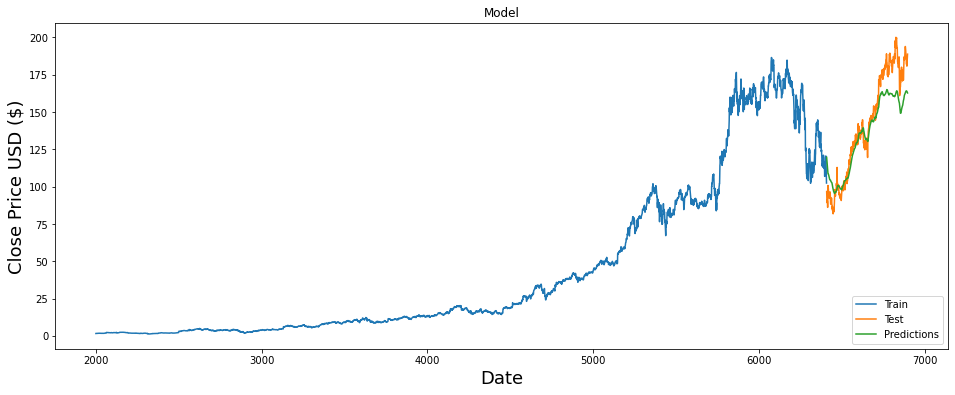

In [26]:
# Plot the data
train = close[:training_len]
valid = close[training_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()